<a href="https://colab.research.google.com/github/mghildi/Random_Forest_Employee_churn/blob/main/EmployeeChurn_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
!gdown 15z210EgWvFp64O5dIFEtW29vks0_BYvn

Downloading...
From: https://drive.google.com/uc?id=15z210EgWvFp64O5dIFEtW29vks0_BYvn
To: /content/ols.csv
100% 1.13M/1.13M [00:00<00:00, 111MB/s]


In [88]:
df = pd.read_csv("/content/ols.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [89]:
df.shape
#19K rows of data with 14 columns

(19104, 14)

In [90]:
df.info()
#We do have null values in Age,Gender , Last workingdate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [91]:

#convert date to date data type
df['Dateofjoining']= pd.to_datetime(df['Dateofjoining'])
df['MMM-YY']= pd.to_datetime(df['MMM-YY'])

In [92]:

#check count of  missing values
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [93]:
import pandas as pd
from sklearn.impute import KNNImputer
from datetime import datetime

# Impute missing values for Age and Gender using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Age', 'Gender']] = imputer.fit_transform(df[['Age', 'Gender']])

# Convert Date columns to datetime objects
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

# Calculate No_of_days
today = datetime.now()
df['No_of_days'] = (today - df['Dateofjoining']).dt.days
df.loc[df['LastWorkingDate'].notnull(), 'No_of_days'] = (df['LastWorkingDate'] - df['Dateofjoining']).dt.days



df.head()


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,No_of_days
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,1894
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1894
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1211
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1211


In [94]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
No_of_days                  0
dtype: int64

In [95]:
df_group = df.groupby('Driver_ID')

In [96]:
df_agg = df_group.agg({
'MMM-YY': 'first',
'Age': 'last',	# Lets take Last Age as it will showcase the la
'Gender': 'first',	# gender will remain same
'City': 'first',	# Assuming City is not repeated for the same d
'Education_Level': 'last',	# latest eductation level so lets take last
'Income': 'mean',	# avg income
'No_of_days': 'mean',
'Dateofjoining': 'first',	# first as it does not chage
'LastWorkingDate': 'last',	# last
'Joining Designation': 'first',	# not repeated for the same driver
'Grade': 'last',	# Grade of the driver at the time of reporting 'Total Business Value': 'sum', # Summing the Total Business Value for the sam 'Quarterly Rating': 'mean'
'Total Business Value': 'sum', # Summing the Total Business Value for the sam 'Quarterly Rating': 'mean'
                        'Quarterly Rating': 'mean'
# Calculating the mean Quarterly Rating for the same driver
}).reset_index()


In [97]:
df_agg.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,No_of_days,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,1288.333333,2018-12-24,2019-03-11,1,1,1715580,2.0
1,2,2020-11-01,31.0,0.0,C7,2,67016.0,1211.000000,2020-11-06,NaT,2,2,0,1.0
2,4,2019-12-01,43.0,0.0,C13,2,65603.0,1265.200000,2019-12-07,2020-04-27,2,2,350000,1.0
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,1271.000000,2019-01-09,2019-03-07,1,1,120360,1.0
4,6,2020-08-01,31.0,1.0,C11,1,78728.0,1309.000000,2020-07-31,NaT,3,3,1265000,1.6


In [98]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   float64       
 7   No_of_days            2381 non-null   float64       
 8   Dateofjoining         2381 non-null   datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   2381 non-null   int64         
 11  Grade                 2381 non-null   int64         
 12  Total Business Value  2381 non-null   int64         
 13  Quarterly Rating  

In [99]:

df_agg['ratingIncrease'] = np.where(df_agg['Quarterly Rating']>1.5, 1, 0)
df_agg['Left_Company'] = np.where(df_agg['LastWorkingDate'].isnull() ,1,0)
df_agg['increaseIncome'] = np.where(df_agg['Income']> df_agg['Income'].mean(),1,0)
df_agg['LastWorkingDate'] = pd.to_datetime(df_agg['LastWorkingDate'], errors='coerce')
# Change column name from 'grade_A' to 'grade'
df_agg.rename(columns={'No_of_days': 'ithCompany'}, inplace=True)

df_agg.drop(columns=['LastWorkingDate'],inplace=True)


In [100]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   float64       
 7   ithCompany            2381 non-null   float64       
 8   Dateofjoining         2381 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   float64       
 13  ratingIncrease    

<ipython-input-101-26887044e03e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_agg.corr()


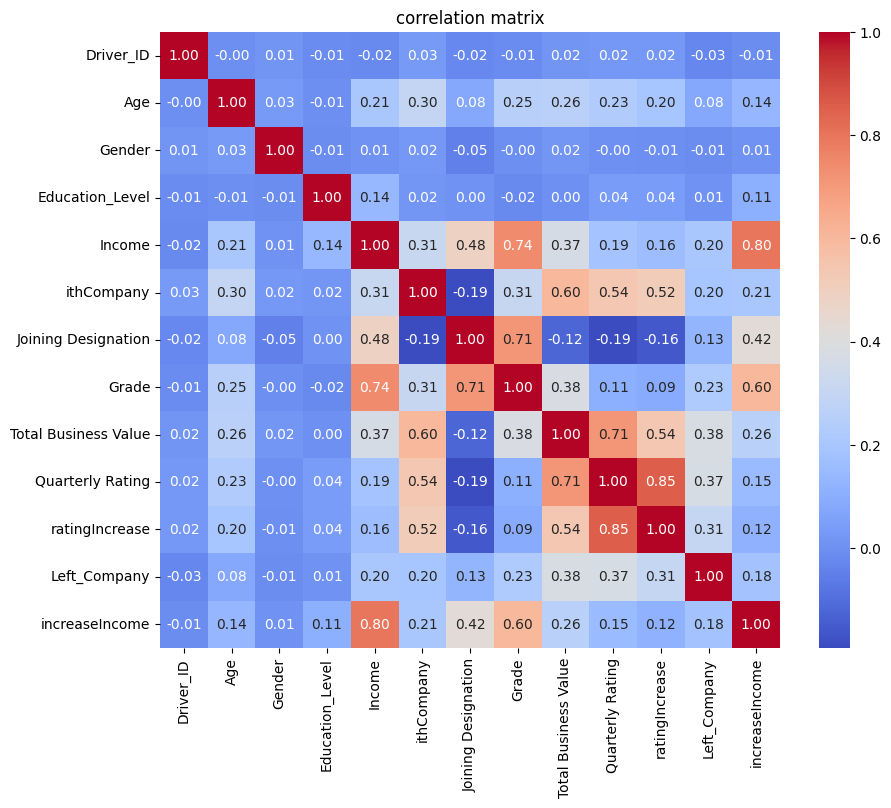

In [101]:
corr_mat = df_agg.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat,annot =True ,cmap ='coolwarm',fmt =".2f")
plt.title("correlation matrix")
plt.show()


In [102]:
df_agg.drop(columns = ['Driver_ID', 'Income', 'Quarterly Rating','MMM-YY','Dateofjoining'], inplace = True)

In [103]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   int64  
 4   ithCompany            2381 non-null   float64
 5   Joining Designation   2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   ratingIncrease        2381 non-null   int64  
 9   Left_Company          2381 non-null   int64  
 10  increaseIncome        2381 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 204.7+ KB


In [110]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'city' is the name of your categorical column
label_encoder = LabelEncoder()

# Fit label encoder and transform 'city' column in both train and test data
df_agg['City'] = label_encoder.fit_transform(df_agg['City'])

In [121]:
df_agg['City'].value_counts()
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   int64  
 3   Education_Level       2381 non-null   int64  
 4   ithCompany            2381 non-null   float64
 5   Joining Designation   2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   ratingIncrease        2381 non-null   int64  
 9   Left_Company          2381 non-null   int64  
 10  increaseIncome        2381 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 204.7 KB


In [104]:
df_agg['Left_Company'].value_counts()
#dataset is imbalance which will be taken care by bagging

0    1616
1     765
Name: Left_Company, dtype: int64

In [125]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X = df_agg.drop(columns = ['Left_Company'])
y = df_agg['Left_Company']
# Split the data into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state =42)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 457 to 860
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1904 non-null   float64
 1   Gender                1904 non-null   float64
 2   City                  1904 non-null   int64  
 3   Education_Level       1904 non-null   int64  
 4   ithCompany            1904 non-null   float64
 5   Joining Designation   1904 non-null   int64  
 6   Grade                 1904 non-null   int64  
 7   Total Business Value  1904 non-null   int64  
 8   ratingIncrease        1904 non-null   int64  
 9   increaseIncome        1904 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 163.6 KB


In [126]:
#Hyperparameter tuning for bagging
#n_estimators - No of base Learners in decision tree for bagging
#max_depth - how deep the tree will grow. In case of None it will grow until it reac #min_samples_split - its a minimum no of samples required for tree to grow (split in #min_samples_leaf - to become a leaf node how much minimum sample is required
#class_weight - it is to handle imbalanced data . as per the dataset , the proportio

param_grid_bagging = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'class_weight': ['balanced', None] }


In [128]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
bagging_model = RandomForestClassifier(random_state=42)



# Perform GridSearchCV for hyperparameter tuning
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, n_jobs=-1)

# Apply all combinations of hyperparameters to find the best one
grid_search_bagging.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [129]:

#lets print the best parameter
print(f"Best hyperparameters for Bagging model: {grid_search_bagging.best_params_}")


Best hyperparameters for Bagging model: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [130]:

#now lets make predection on test data
y_pred_bagging = grid_search_bagging.predict(X_test)


In [133]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate Bagging model after tuning
print("\nBagging Model after tuning:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))



Bagging Model after tuning:
Confusion Matrix:
[[277  50]
 [ 27 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       327
           1       0.71      0.82      0.76       150

    accuracy                           0.84       477
   macro avg       0.81      0.83      0.82       477
weighted avg       0.85      0.84      0.84       477



Analysis:
The model shows relatively good performance with an accuracy of 84%.
Precision, recall, and F1-score are higher for class 0 (negative class) compared to class 1 (positive class), indicating better performance in predicting instances of the negative class.
The model has a slightly higher precision for class 0, suggesting that when it predicts an instance as class 0, it is more likely to be correct compared to when it predicts an instance as class 1.
The recall for class 1 is slightly higher than for class 0, indicating that the model is better at capturing positive instances.
Overall, the model seems to generalize well, but further analysis and potential model improvements may be needed to balance performance across classes.